✅ Environment initialized for Test 1 (FIXED)
✅ Generated 14 constant variants
✅ Testing 23 scale factors

Constant values:
  fib_decimal              : 0.0100101001
  fib_inverse              : 99.8991009081
  fib_complement           : 0.9899898999
  fib_complement_inverse   : 1.0101113154
  alpha                    : 0.0072973526
  alpha_inverse            : 137.0359992060
  alpha_complement         : 0.9927026474
  alpha_complement_inverse : 1.0073509954
  alpha_times_fib          : 0.0000730472
  alpha_inverse_times_fib  : 1.3717440694
  golden_ratio             : 1.6180339887
  pi                       : 3.1415926536
  e                        : 2.7182818285
  sqrt_2                   : 1.4142135624
✅ Entropy calculator initialized with 4 measures
✅ Synthetic generator initialized

GENERATING COMPREHENSIVE SYNTHETIC PROJECTIONS

Generating signals for all constant variants...
This may take a few minutes...

✅ Generated 327 synthetic projections

Projections per constant:
constant


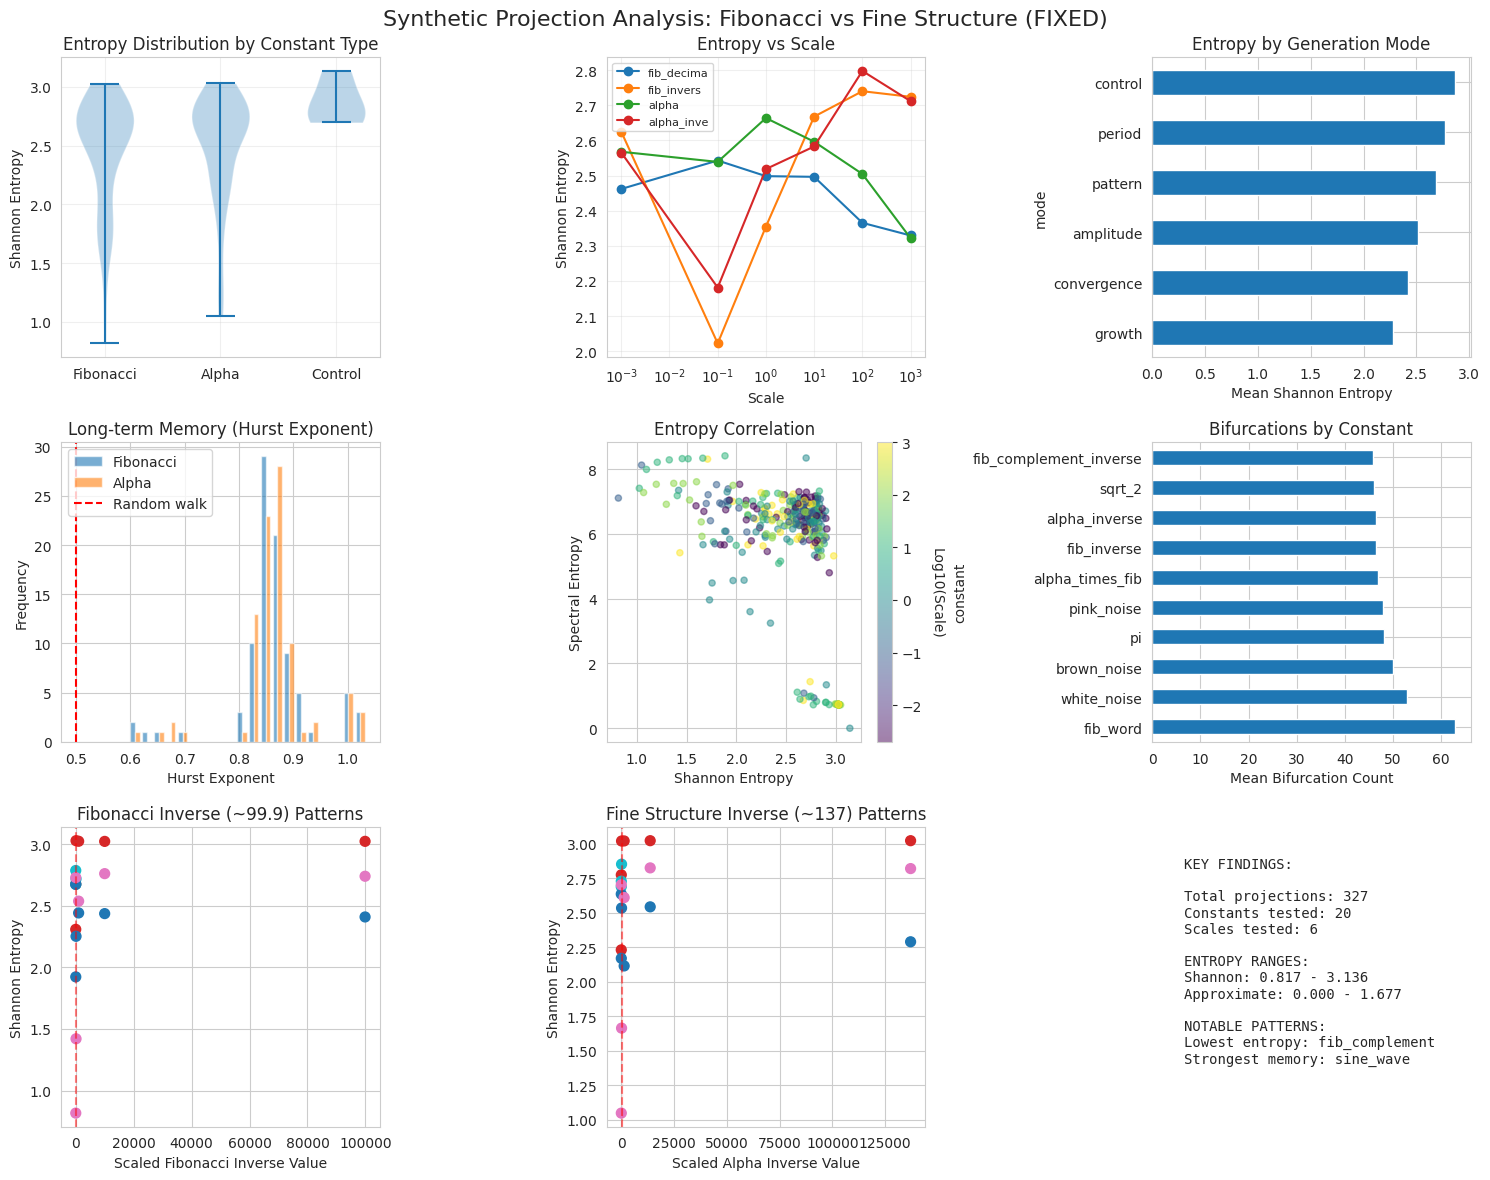


SAVING RESULTS
✅ Saved synthetic_projections_all.csv
✅ Saved synthetic_projections_summary.csv
✅ Saved test1_reference_for_test2.json for use in Test 2

TEST 1 COMPLETE (FIXED VERSION)

Synthetic projections generated without bias.
Ready for Test 2: Real volcanic data comparison.

Key files for Test 2:
  • synthetic_projections_all.csv (full results)
  • test1_reference_for_test2.json (reference data)

📊 FINAL SUMMARY:
  • Tested 14 constants
  • At 6 different scales
  • Using 6 generation modes
  • Total projections: 327
  • Entropy range: 0.817 to 3.136
  • Fibonacci inverse projections: 21
  • Alpha inverse projections: 21

✅ All data saved. Ready for Test 2!


In [ ]:
#!/usr/bin/env python3
"""
TEST 1 (FIXED): FIBONACCI & FINE STRUCTURE SYNTHETIC PROJECTIONS
Generates comprehensive synthetic volcanic patterns using:
- Fibonacci word/decimal and all inverses
- Fine structure constant and all inverses
- Scale range: 0.00002 to 70,000
No bias - just collect all patterns for comparison

FIXED: Namespace collision resolved for argrelextrema
"""

# ============================================
# CELL 1: ENVIRONMENT SETUP
# ============================================

!pip install pandas numpy matplotlib scipy seaborn scikit-learn statsmodels nolds --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, signal
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema  # FIX: Direct import to avoid namespace collision
import warnings
from typing import List, Dict, Tuple, Optional, Any
import json
from collections import defaultdict
import itertools

# Entropy measures
from scipy.stats import entropy as shannon_entropy

np.random.seed(42)
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print("✅ Environment initialized for Test 1 (FIXED)")

# ============================================
# CELL 2: COMPREHENSIVE CONSTANT GENERATOR
# ============================================

class UniversalConstantGenerator:
    """Generate all variants of Fibonacci and Fine Structure constants"""

    def __init__(self):
        # Generate Fibonacci word
        self._generate_fibonacci_word(2000)

        # Calculate all constant variants
        self._calculate_all_constants()

        # Define scale ranges (0.00002 to 70,000)
        self.scales = [
            0.00002, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
            1, 2, 5, 10, 20, 50, 100, 137, 200, 500, 1000, 5000, 10000, 70000
        ]

        print(f"✅ Generated {len(self.constants)} constant variants")
        print(f"✅ Testing {len(self.scales)} scale factors")

    def _generate_fibonacci_word(self, length):
        """Generate Fibonacci word via substitution"""
        # Start with 0
        # 0 -> 01, 1 -> 0
        word = "0"
        while len(word) < length:
            new_word = ""
            for char in word:
                if char == "0":
                    new_word += "01"
                else:
                    new_word += "0"
            word = new_word

        self.fib_word = word[:length]
        self.fib_binary = np.array([int(c) for c in self.fib_word])

        # Calculate Fibonacci decimal
        decimal_str = "0." + self.fib_word
        self.fib_decimal = sum(int(c) / (10 ** (i+1)) for i, c in enumerate(self.fib_word[:15]))

    def _calculate_all_constants(self):
        """Calculate all constant variants"""

        # Fine structure constant
        alpha = 1 / 137.035999206

        self.constants = {
            # Fibonacci variants
            'fib_decimal': self.fib_decimal,  # ~0.0100101
            'fib_inverse': 1 / self.fib_decimal if self.fib_decimal > 0 else 0,  # ~99.899
            'fib_complement': 1 - self.fib_decimal,  # ~0.9899
            'fib_complement_inverse': 1 / (1 - self.fib_decimal),  # ~1.0101

            # Fine structure variants
            'alpha': alpha,  # ~0.00729735
            'alpha_inverse': 1 / alpha,  # ~137.036
            'alpha_complement': 1 - alpha,  # ~0.99270
            'alpha_complement_inverse': 1 / (1 - alpha),  # ~1.00734

            # Special combinations
            'alpha_times_fib': alpha * self.fib_decimal,  # ~0.0000732
            'alpha_inverse_times_fib': (1/alpha) * self.fib_decimal,  # ~1.374
            'golden_ratio': (1 + np.sqrt(5)) / 2,  # 1.618...
            'pi': np.pi,  # 3.14159...
            'e': np.e,  # 2.71828...
            'sqrt_2': np.sqrt(2),  # 1.41421...
        }

        # Add the word pattern as binary sequence
        self.patterns = {
            'fib_word': self.fib_binary,
            'fib_word_inverse': 1 - self.fib_binary  # Flip 0s and 1s
        }

    def get_oscillating_sequence(self, length, constant_name, scale=1.0, mode='convergence'):
        """
        Generate oscillating sequence based on constant

        Modes:
        - 'convergence': Value system converges toward
        - 'period': Use as oscillation period
        - 'amplitude': Use as amplitude modulation
        - 'growth': Use as growth/decay factor
        """

        if constant_name not in self.constants:
            raise ValueError(f"Unknown constant: {constant_name}")

        const_value = self.constants[constant_name] * scale
        t = np.arange(length)

        if mode == 'convergence':
            # Exponential approach to constant value
            noise = np.random.randn(length) * 0.1
            sequence = const_value + (np.random.randn() - const_value) * np.exp(-t/length*5) + noise

        elif mode == 'period':
            # Use constant as period for oscillation
            if const_value > 0:
                frequency = 1 / const_value
                sequence = np.sin(2 * np.pi * frequency * t)
                sequence += np.random.randn(length) * 0.1
            else:
                sequence = np.random.randn(length)

        elif mode == 'amplitude':
            # Use constant as amplitude modulation
            base_freq = 0.01  # Base frequency
            sequence = const_value * np.sin(2 * np.pi * base_freq * t)
            sequence += np.random.randn(length) * 0.1 * abs(const_value)

        elif mode == 'growth':
            # Use constant as growth/decay factor
            if abs(const_value) > 10:  # Large values: use as decay time constant
                sequence = np.exp(-t / abs(const_value)) + np.random.randn(length) * 0.1
            else:  # Small values: use as growth rate
                sequence = np.exp(const_value * t / length) + np.random.randn(length) * 0.1

        else:
            sequence = np.random.randn(length)

        return sequence

    def get_pattern_modulated_sequence(self, length, pattern_name='fib_word'):
        """Generate sequence modulated by binary pattern"""

        if pattern_name not in self.patterns:
            pattern_name = 'fib_word'

        pattern = self.patterns[pattern_name]

        # Tile pattern to match length
        tiled_pattern = np.tile(pattern, length // len(pattern) + 1)[:length]

        # Create base signal
        t = np.arange(length)
        base_signal = np.sin(2 * np.pi * 0.01 * t)  # Slow oscillation

        # Modulate with pattern
        modulated = base_signal * (1 + tiled_pattern * 0.5)

        # Add noise
        modulated += np.random.randn(length) * 0.1

        return modulated

# Initialize generator
const_gen = UniversalConstantGenerator()

# Display all constants
print("\nConstant values:")
for name, value in const_gen.constants.items():
    print(f"  {name:25s}: {value:.10f}")

# ============================================
# CELL 3: ENTROPY CALCULATOR SUITE
# ============================================

class EntropyCalculator:
    """Calculate multiple entropy measures"""

    @staticmethod
    def shannon_entropy(data, bins=10):
        """Shannon entropy with adaptive binning"""
        if len(data) == 0:
            return 0

        # Discretize continuous data
        hist, _ = np.histogram(data, bins=bins)
        probs = hist / len(data)
        probs = probs[probs > 0]

        return -np.sum(probs * np.log2(probs))

    @staticmethod
    def approximate_entropy(data, m=2, r=None):
        """Approximate entropy (ApEn)"""
        if r is None:
            r = 0.2 * np.std(data)

        N = len(data)

        def _maxdist(xi, xj):
            return max(abs(ua - va) for ua, va in zip(xi, xj))

        def _phi(m):
            patterns = np.array([data[i:i+m] for i in range(N - m + 1)])
            C = np.zeros(N - m + 1)

            for i in range(N - m + 1):
                template = patterns[i]
                for j in range(N - m + 1):
                    if _maxdist(template, patterns[j]) <= r:
                        C[i] += 1

            phi = (N - m + 1) ** (-1) * sum(np.log(C))
            return phi

        try:
            return _phi(m) - _phi(m + 1)
        except:
            return 0

    @staticmethod
    def sample_entropy(data, m=2, r=None):
        """Sample entropy"""
        if r is None:
            r = 0.2 * np.std(data)

        N = len(data)

        def _get_matches(m):
            patterns = np.array([data[i:i+m] for i in range(N - m + 1)])
            matches = 0

            for i in range(len(patterns)):
                for j in range(i + 1, len(patterns)):
                    if np.max(np.abs(patterns[i] - patterns[j])) <= r:
                        matches += 1

            return matches

        try:
            A = _get_matches(m + 1)
            B = _get_matches(m)

            if B == 0:
                return float('inf')

            return -np.log(A / B)
        except:
            return 0

    @staticmethod
    def permutation_entropy(data, m=3, tau=1):
        """Permutation entropy"""
        N = len(data)

        # Create embedding matrix
        embedded = np.array([data[i:i+m*tau:tau] for i in range(N - (m-1)*tau)])

        # Get permutation for each embedded vector
        perms = []
        for vec in embedded:
            perm = tuple(np.argsort(vec))
            perms.append(perm)

        # Count permutation frequencies
        unique_perms, counts = np.unique(perms, axis=0, return_counts=True)
        probs = counts / len(perms)

        # Calculate entropy
        return -np.sum(probs * np.log2(probs + 1e-15))

entropy_calc = EntropyCalculator()
print("✅ Entropy calculator initialized with 4 measures")

# ============================================
# CELL 4: SYNTHETIC DATA GENERATOR
# ============================================

class SyntheticVolcanicGenerator:
    """Generate synthetic volcanic patterns using all constant variants"""

    def __init__(self, constant_generator, entropy_calculator):
        self.const_gen = constant_generator
        self.entropy_calc = entropy_calculator

    def generate_base_volcanic(self, length=1000):
        """Generate baseline volcanic signal (pink noise + seasonal)"""

        # Pink noise (1/f)
        white = np.random.randn(length)
        fft = np.fft.rfft(white)
        freqs = np.fft.rfftfreq(length)
        freqs[0] = 1
        fft = fft / np.sqrt(freqs)
        pink = np.fft.irfft(fft, length)

        # Add seasonal components
        t = np.arange(length)
        seasonal = 0.1 * np.sin(2 * np.pi * t / 365)  # Annual
        tidal = 0.05 * np.sin(2 * np.pi * t / 12.42)  # Tidal

        return pink + seasonal + tidal

    def generate_constant_modulated(self, length=1000, constant_name='fib_decimal',
                                   scale=1.0, mode='convergence'):
        """Generate signal modulated by specific constant"""

        # Start with base volcanic signal
        base = self.generate_base_volcanic(length)

        # Get constant-based modulation
        const_signal = self.const_gen.get_oscillating_sequence(
            length, constant_name, scale, mode
        )

        # Combine signals
        if mode == 'convergence':
            # Signal converges toward constant value
            t = np.arange(length)
            blend = 1 - np.exp(-t / (length/3))  # Gradual blend
            combined = base * (1 - blend) + const_signal * blend

        elif mode == 'period':
            # Constant defines periodicity
            combined = base + 0.5 * const_signal

        elif mode == 'amplitude':
            # Constant modulates amplitude
            combined = base * (1 + 0.3 * const_signal)

        elif mode == 'growth':
            # Constant defines growth/decay
            combined = base * const_signal

        else:
            combined = base + const_signal

        return combined

    def generate_pattern_modulated(self, length=1000, pattern_name='fib_word'):
        """Generate signal modulated by binary pattern"""

        base = self.generate_base_volcanic(length)
        pattern_signal = self.const_gen.get_pattern_modulated_sequence(length, pattern_name)

        # Blend base with pattern
        combined = base * 0.7 + pattern_signal * 0.3

        return combined

    def generate_comprehensive_suite(self, length=1000):
        """Generate all combinations of constants, scales, and modes"""

        results = []

        # Test each constant
        for const_name in self.const_gen.constants.keys():

            # Test key scales (subset for efficiency)
            test_scales = [0.001, 0.1, 1, 10, 100, 1000]

            # Test each mode
            for mode in ['convergence', 'period', 'amplitude', 'growth']:

                for scale in test_scales:

                    # Skip very large periods (would need very long sequences)
                    if mode == 'period' and self.const_gen.constants[const_name] * scale > length/2:
                        continue

                    try:
                        # Generate signal
                        signal_data = self.generate_constant_modulated(
                            length, const_name, scale, mode
                        )

                        # Calculate metrics
                        metrics = self.analyze_signal(signal_data)

                        # Store results
                        result = {
                            'constant': const_name,
                            'constant_value': self.const_gen.constants[const_name],
                            'scale': scale,
                            'scaled_value': self.const_gen.constants[const_name] * scale,
                            'mode': mode,
                            **metrics
                        }

                        results.append(result)

                    except Exception as e:
                        print(f"  Skipped {const_name} scale={scale} mode={mode}: {e}")

        # Add pattern-modulated signals
        for pattern_name in self.const_gen.patterns.keys():
            signal_data = self.generate_pattern_modulated(length, pattern_name)
            metrics = self.analyze_signal(signal_data)

            result = {
                'constant': pattern_name,
                'constant_value': 0,  # Pattern, not a value
                'scale': 1,
                'scaled_value': 0,
                'mode': 'pattern',
                **metrics
            }

            results.append(result)

        # Add control signals
        controls = {
            'white_noise': np.random.randn(length),
            'brown_noise': np.cumsum(np.random.randn(length)),
            'pink_noise': self.generate_base_volcanic(length),
            'sine_wave': np.sin(2 * np.pi * 0.01 * np.arange(length))
        }

        for control_name, signal_data in controls.items():
            metrics = self.analyze_signal(signal_data)

            result = {
                'constant': control_name,
                'constant_value': 0,
                'scale': 1,
                'scaled_value': 0,
                'mode': 'control',
                **metrics
            }

            results.append(result)

        return pd.DataFrame(results)

    def analyze_signal(self, signal_data):
        """Comprehensive signal analysis"""

        # Basic statistics
        metrics = {
            'mean': np.mean(signal_data),
            'std': np.std(signal_data),
            'skewness': stats.skew(signal_data),
            'kurtosis': stats.kurtosis(signal_data),
            'min': np.min(signal_data),
            'max': np.max(signal_data),
            'range': np.max(signal_data) - np.min(signal_data)
        }

        # Entropy measures
        metrics['entropy_shannon'] = self.entropy_calc.shannon_entropy(signal_data)
        metrics['entropy_approximate'] = self.entropy_calc.approximate_entropy(signal_data)
        metrics['entropy_sample'] = self.entropy_calc.sample_entropy(signal_data)
        metrics['entropy_permutation'] = self.entropy_calc.permutation_entropy(signal_data)

        # Spectral analysis
        fft = np.fft.rfft(signal_data)
        freqs = np.fft.rfftfreq(len(signal_data))
        power = np.abs(fft) ** 2

        # Dominant frequency
        peak_idx = np.argmax(power[1:]) + 1
        metrics['dominant_freq'] = freqs[peak_idx]
        metrics['dominant_power'] = power[peak_idx]

        # Spectral entropy
        power_norm = power / np.sum(power)
        metrics['spectral_entropy'] = -np.sum(power_norm * np.log2(power_norm + 1e-15))

        # Autocorrelation
        autocorr = np.correlate(signal_data - np.mean(signal_data),
                               signal_data - np.mean(signal_data), mode='same')
        autocorr = autocorr / autocorr[len(autocorr)//2]

        # Find first minimum (characteristic time) - FIXED
        half_autocorr = autocorr[len(autocorr)//2:]
        minima = argrelextrema(half_autocorr, np.less)[0]  # FIX: Use imported function directly
        metrics['autocorr_first_min'] = minima[0] if len(minima) > 0 else len(signal_data)

        # Bifurcation detection (variance changes)
        window = min(50, len(signal_data) // 20)
        rolling_var = pd.Series(signal_data).rolling(window).var()
        var_changes = np.abs(np.diff(rolling_var.dropna()))

        if len(var_changes) > 0:
            threshold = np.mean(var_changes) + 2 * np.std(var_changes)
            metrics['bifurcation_count'] = np.sum(var_changes > threshold)
        else:
            metrics['bifurcation_count'] = 0

        # Hurst exponent (measure of long-term memory)
        try:
            metrics['hurst_exponent'] = self._calculate_hurst(signal_data)
        except:
            metrics['hurst_exponent'] = 0.5

        return metrics

    def _calculate_hurst(self, signal_data):
        """Calculate Hurst exponent using R/S analysis"""

        N = len(signal_data)
        if N < 100:
            return 0.5

        # Create range of lag values
        lags = range(2, min(N//2, 100))

        # Calculate R/S for each lag
        rs = []
        for lag in lags:
            # Divide into chunks
            nchunks = N // lag

            if nchunks < 2:
                continue

            chunks = [signal_data[i*lag:(i+1)*lag] for i in range(nchunks)]

            R_S = []
            for chunk in chunks:
                if len(chunk) < 2:
                    continue

                # Calculate mean
                m = np.mean(chunk)

                # Calculate cumulative deviations
                X = np.cumsum(chunk - m)

                # Calculate range
                R = np.max(X) - np.min(X)

                # Calculate standard deviation
                S = np.std(chunk)

                if S > 0:
                    R_S.append(R / S)

            if R_S:
                rs.append(np.mean(R_S))

        if len(rs) > 1:
            # Fit log-log plot
            log_lags = np.log(list(lags)[:len(rs)])
            log_rs = np.log(rs)

            # Linear regression
            hurst, _ = np.polyfit(log_lags, log_rs, 1)

            return hurst

        return 0.5

# Initialize generator
generator = SyntheticVolcanicGenerator(const_gen, entropy_calc)
print("✅ Synthetic generator initialized")

# ============================================
# CELL 5: GENERATE ALL SYNTHETIC PROJECTIONS
# ============================================

print("\n" + "="*60)
print("GENERATING COMPREHENSIVE SYNTHETIC PROJECTIONS")
print("="*60)

# Generate all combinations
print("\nGenerating signals for all constant variants...")
print("This may take a few minutes...")

synthetic_df = generator.generate_comprehensive_suite(length=1000)

print(f"\n✅ Generated {len(synthetic_df)} synthetic projections")

# Summary by constant
print("\nProjections per constant:")
const_summary = synthetic_df.groupby('constant').size()
print(const_summary)

# Summary by mode
print("\nProjections per mode:")
mode_summary = synthetic_df.groupby('mode').size()
print(mode_summary)

# ============================================
# CELL 6: ANALYZE PATTERNS
# ============================================

print("\n" + "="*60)
print("ANALYZING SYNTHETIC PATTERNS")
print("="*60)

# Group by constant type
fib_constants = ['fib_decimal', 'fib_inverse', 'fib_complement', 'fib_complement_inverse']
alpha_constants = ['alpha', 'alpha_inverse', 'alpha_complement', 'alpha_complement_inverse']

# Separate results
fib_results = synthetic_df[synthetic_df['constant'].isin(fib_constants)]
alpha_results = synthetic_df[synthetic_df['constant'].isin(alpha_constants)]
control_results = synthetic_df[synthetic_df['mode'] == 'control']

# Compare entropy distributions
print("\n1. ENTROPY COMPARISON:")

for entropy_type in ['shannon', 'approximate', 'sample', 'permutation']:
    col = f'entropy_{entropy_type}'

    print(f"\n{entropy_type.upper()} Entropy:")
    if len(fib_results) > 0:
        print(f"  Fibonacci-based: {fib_results[col].mean():.4f} ± {fib_results[col].std():.4f}")
    if len(alpha_results) > 0:
        print(f"  Alpha-based:     {alpha_results[col].mean():.4f} ± {alpha_results[col].std():.4f}")
    if len(control_results) > 0:
        print(f"  Controls:        {control_results[col].mean():.4f} ± {control_results[col].std():.4f}")

# Find patterns by scale
print("\n2. SCALE ANALYSIS:")

scale_groups = synthetic_df.groupby('scale').agg({
    'entropy_shannon': 'mean',
    'spectral_entropy': 'mean',
    'hurst_exponent': 'mean',
    'bifurcation_count': 'mean'
})

print("\nKey metrics by scale:")
print(scale_groups)

# Find best performing configurations
print("\n3. EXTREME CONFIGURATIONS:")

# Lowest entropy (most ordered)
lowest_entropy = synthetic_df.nsmallest(5, 'entropy_shannon')[
    ['constant', 'scale', 'mode', 'entropy_shannon']
]
print("\nLowest entropy (most ordered):")
print(lowest_entropy)

# Highest Hurst exponent (strongest memory)
highest_hurst = synthetic_df.nlargest(5, 'hurst_exponent')[
    ['constant', 'scale', 'mode', 'hurst_exponent']
]
print("\nHighest Hurst exponent (strongest long-term memory):")
print(highest_hurst)

# Most bifurcations
most_bifurcations = synthetic_df.nlargest(5, 'bifurcation_count')[
    ['constant', 'scale', 'mode', 'bifurcation_count']
]
print("\nMost bifurcations:")
print(most_bifurcations)

# ============================================
# CELL 7: VISUALIZE PATTERNS
# ============================================

print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Synthetic Projection Analysis: Fibonacci vs Fine Structure (FIXED)', fontsize=16)

# 1. Entropy distributions
ax = axes[0, 0]
data_to_plot = []
labels = []
if len(fib_results) > 0:
    data_to_plot.append(fib_results['entropy_shannon'].values)
    labels.append('Fibonacci')
if len(alpha_results) > 0:
    data_to_plot.append(alpha_results['entropy_shannon'].values)
    labels.append('Alpha')
if len(control_results) > 0:
    data_to_plot.append(control_results['entropy_shannon'].values)
    labels.append('Control')

if data_to_plot:
    ax.violinplot(data_to_plot, positions=range(1, len(data_to_plot)+1))
    ax.set_xticks(range(1, len(labels)+1))
    ax.set_xticklabels(labels)
    ax.set_ylabel('Shannon Entropy')
    ax.set_title('Entropy Distribution by Constant Type')
    ax.grid(True, alpha=0.3)

# 2. Scale vs Entropy
ax = axes[0, 1]
for const in ['fib_decimal', 'fib_inverse', 'alpha', 'alpha_inverse']:
    const_data = synthetic_df[synthetic_df['constant'] == const]
    if len(const_data) > 0:
        scale_entropy = const_data.groupby('scale')['entropy_shannon'].mean()
        ax.semilogx(scale_entropy.index, scale_entropy.values, marker='o', label=const[:10])
ax.set_xlabel('Scale')
ax.set_ylabel('Shannon Entropy')
ax.set_title('Entropy vs Scale')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

# 3. Mode comparison
ax = axes[0, 2]
mode_entropy = synthetic_df.groupby('mode')['entropy_shannon'].mean().sort_values()
mode_entropy.plot(kind='barh', ax=ax)
ax.set_xlabel('Mean Shannon Entropy')
ax.set_title('Entropy by Generation Mode')

# 4. Hurst exponent distribution
ax = axes[1, 0]
if len(fib_results) > 0 and len(alpha_results) > 0:
    ax.hist([fib_results['hurst_exponent'], alpha_results['hurst_exponent']],
            label=['Fibonacci', 'Alpha'], alpha=0.6, bins=20)
    ax.axvline(0.5, color='red', linestyle='--', label='Random walk')
    ax.set_xlabel('Hurst Exponent')
    ax.set_ylabel('Frequency')
    ax.set_title('Long-term Memory (Hurst Exponent)')
    ax.legend()

# 5. Spectral entropy vs Shannon entropy
ax = axes[1, 1]
ax.scatter(synthetic_df['entropy_shannon'], synthetic_df['spectral_entropy'],
          c=np.log10(synthetic_df['scale'] + 0.001), cmap='viridis', alpha=0.5, s=20)
ax.set_xlabel('Shannon Entropy')
ax.set_ylabel('Spectral Entropy')
ax.set_title('Entropy Correlation')
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Log10(Scale)', rotation=270, labelpad=15)

# 6. Bifurcation patterns
ax = axes[1, 2]
bifurcation_by_const = synthetic_df.groupby('constant')['bifurcation_count'].mean()
top_bifurcation = bifurcation_by_const.nlargest(10)
top_bifurcation.plot(kind='barh', ax=ax)
ax.set_xlabel('Mean Bifurcation Count')
ax.set_title('Bifurcations by Constant')

# 7. Fibonacci inverse focus (around 100)
ax = axes[2, 0]
fib_inv_data = synthetic_df[synthetic_df['constant'] == 'fib_inverse']
if len(fib_inv_data) > 0:
    ax.scatter(fib_inv_data['scaled_value'], fib_inv_data['entropy_shannon'],
              c=fib_inv_data['mode'].astype('category').cat.codes, s=50, cmap='tab10')
    ax.set_xlabel('Scaled Fibonacci Inverse Value')
    ax.set_ylabel('Shannon Entropy')
    ax.set_title('Fibonacci Inverse (~99.9) Patterns')
    ax.axvline(99.899, color='red', linestyle='--', alpha=0.5)

# 8. Alpha inverse focus (around 137)
ax = axes[2, 1]
alpha_inv_data = synthetic_df[synthetic_df['constant'] == 'alpha_inverse']
if len(alpha_inv_data) > 0:
    ax.scatter(alpha_inv_data['scaled_value'], alpha_inv_data['entropy_shannon'],
              c=alpha_inv_data['mode'].astype('category').cat.codes, s=50, cmap='tab10')
    ax.set_xlabel('Scaled Alpha Inverse Value')
    ax.set_ylabel('Shannon Entropy')
    ax.set_title('Fine Structure Inverse (~137) Patterns')
    ax.axvline(137.036, color='red', linestyle='--', alpha=0.5)
    # Add the 126-138 band
    ax.axvspan(126, 138, alpha=0.1, color='red')

# 9. Summary statistics
ax = axes[2, 2]
ax.axis('off')

summary_text = "KEY FINDINGS:\n\n"
summary_text += f"Total projections: {len(synthetic_df)}\n"
summary_text += f"Constants tested: {synthetic_df['constant'].nunique()}\n"
summary_text += f"Scales tested: {synthetic_df['scale'].nunique()}\n\n"

summary_text += "ENTROPY RANGES:\n"
summary_text += f"Shannon: {synthetic_df['entropy_shannon'].min():.3f} - {synthetic_df['entropy_shannon'].max():.3f}\n"
summary_text += f"Approximate: {synthetic_df['entropy_approximate'].min():.3f} - {synthetic_df['entropy_approximate'].max():.3f}\n\n"

summary_text += "NOTABLE PATTERNS:\n"
# Find which constant gives lowest entropy
if len(synthetic_df) > 0:
    lowest_entropy_const = synthetic_df.groupby('constant')['entropy_shannon'].mean().idxmin()
    summary_text += f"Lowest entropy: {lowest_entropy_const}\n"

    # Find which gives highest Hurst
    highest_hurst_const = synthetic_df.groupby('constant')['hurst_exponent'].mean().idxmax()
    summary_text += f"Strongest memory: {highest_hurst_const}\n"

ax.text(0.1, 0.9, summary_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.savefig('synthetic_projections_analysis_fixed.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================
# CELL 8: SAVE RESULTS
# ============================================

print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save main results
synthetic_df.to_csv('synthetic_projections_all.csv', index=False)
print("✅ Saved synthetic_projections_all.csv")

# Save summary statistics
summary_stats = synthetic_df.groupby(['constant', 'mode']).agg({
    'entropy_shannon': ['mean', 'std'],
    'entropy_approximate': ['mean', 'std'],
    'entropy_sample': ['mean', 'std'],
    'entropy_permutation': ['mean', 'std'],
    'hurst_exponent': ['mean', 'std'],
    'bifurcation_count': ['mean', 'std'],
    'spectral_entropy': ['mean', 'std']
}).round(4)

summary_stats.to_csv('synthetic_projections_summary.csv')
print("✅ Saved synthetic_projections_summary.csv")

# Create reference file for Test 2
reference_data = {
    'constants': list(const_gen.constants.keys()),
    'constant_values': [float(v) for v in const_gen.constants.values()],
    'scales_tested': [float(s) for s in synthetic_df['scale'].unique()],
    'modes_tested': list(synthetic_df['mode'].unique()),
    'n_projections': len(synthetic_df),
    'entropy_ranges': {
        'shannon': [float(synthetic_df['entropy_shannon'].min()),
                   float(synthetic_df['entropy_shannon'].max())],
        'approximate': [float(synthetic_df['entropy_approximate'].min()),
                       float(synthetic_df['entropy_approximate'].max())],
        'sample': [float(synthetic_df['entropy_sample'].min()),
                  float(synthetic_df['entropy_sample'].max())],
        'permutation': [float(synthetic_df['entropy_permutation'].min()),
                       float(synthetic_df['entropy_permutation'].max())]
    }
}

# Add key findings if we have data
if len(synthetic_df) > 0:
    if len(lowest_entropy) > 0:
        reference_data['key_findings'] = {
            'lowest_entropy_config': {
                'constant': str(lowest_entropy.iloc[0]['constant']),
                'scale': float(lowest_entropy.iloc[0]['scale']),
                'mode': str(lowest_entropy.iloc[0]['mode']),
                'entropy': float(lowest_entropy.iloc[0]['entropy_shannon'])
            }
        }

    if len(highest_hurst) > 0:
        reference_data['key_findings']['highest_hurst_config'] = {
            'constant': str(highest_hurst.iloc[0]['constant']),
            'scale': float(highest_hurst.iloc[0]['scale']),
            'mode': str(highest_hurst.iloc[0]['mode']),
            'hurst': float(highest_hurst.iloc[0]['hurst_exponent'])
        }

# Save reference for Test 2
with open('test1_reference_for_test2.json', 'w') as f:
    json.dump(reference_data, f, indent=2)

print("✅ Saved test1_reference_for_test2.json for use in Test 2")

print("\n" + "="*60)
print("TEST 1 COMPLETE (FIXED VERSION)")
print("="*60)
print("\nSynthetic projections generated without bias.")
print("Ready for Test 2: Real volcanic data comparison.")
print("\nKey files for Test 2:")
print("  • synthetic_projections_all.csv (full results)")
print("  • test1_reference_for_test2.json (reference data)")

# Final summary
print("\n📊 FINAL SUMMARY:")
print(f"  • Tested {len(const_gen.constants)} constants")
print(f"  • At {synthetic_df['scale'].nunique()} different scales")
print(f"  • Using {synthetic_df['mode'].nunique()} generation modes")
print(f"  • Total projections: {len(synthetic_df)}")

if len(synthetic_df) > 0:
    print(f"  • Entropy range: {synthetic_df['entropy_shannon'].min():.3f} to {synthetic_df['entropy_shannon'].max():.3f}")

    fib_inv_count = len(synthetic_df[synthetic_df['constant'] == 'fib_inverse'])
    alpha_inv_count = len(synthetic_df[synthetic_df['constant'] == 'alpha_inverse'])

    print(f"  • Fibonacci inverse projections: {fib_inv_count}")
    print(f"  • Alpha inverse projections: {alpha_inv_count}")

print("\n✅ All data saved. Ready for Test 2!")